In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir(r'D:\CODING\Python Projects')

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

In [4]:
shootingdata = pd.read_csv('shootings.csv')

In [16]:
shootingdata.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2 01 2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2 01 2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,3 01 2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,4 01 2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,4 01 2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
shootingdata.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,12 06 2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,12 06 2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,13 06 2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,13 06 2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,15 06 2020,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


In [18]:
shootingdata.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [6]:
shootingdata.shape

(4895, 15)

In [21]:
shootingdata.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [8]:
shootingdata.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

# Race Counts

In [9]:
shootingdata['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

# Which Race was shot the most

<AxesSubplot:title={'center':'Which race was shot the most'}, xlabel='race', ylabel='count'>

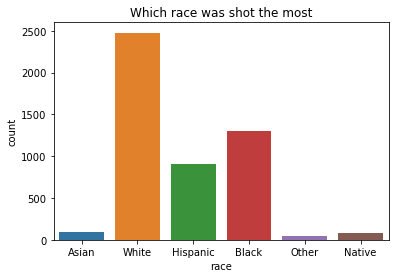

In [36]:
plt.title('Which race was shot the most')
sns.countplot(data = shootingdata, x = 'race')

# Shots categorized by Gender

In [10]:
shot_by_gender = shootingdata.gender.value_counts()
shot_by_gender

M    4673
F     222
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x133700011c0>,
 [Text(1.0888537659492934, -0.15619691539221137, 'M'),
  Text(-1.0888537659492932, 0.15619691539221248, 'F')],
 [Text(0.5939202359723418, -0.08519831748666074, '95.5%'),
  Text(-0.5939202359723417, 0.08519831748666133, '4.5%')])

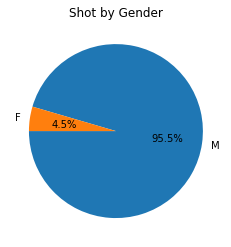

In [38]:
plt.title("Shot by Gender")
plt.pie(shot_by_gender, labels=shot_by_gender.index, autopct='%1.1f%%', startangle=180)

# Shots Categorized by Age

In [21]:
shot_by_age = shootingdata.age.value_counts()
shot_by_age

25.0    176
31.0    174
27.0    165
33.0    164
29.0    160
       ... 
13.0      1
91.0      1
79.0      1
78.0      1
81.0      1
Name: age, Length: 76, dtype: int64

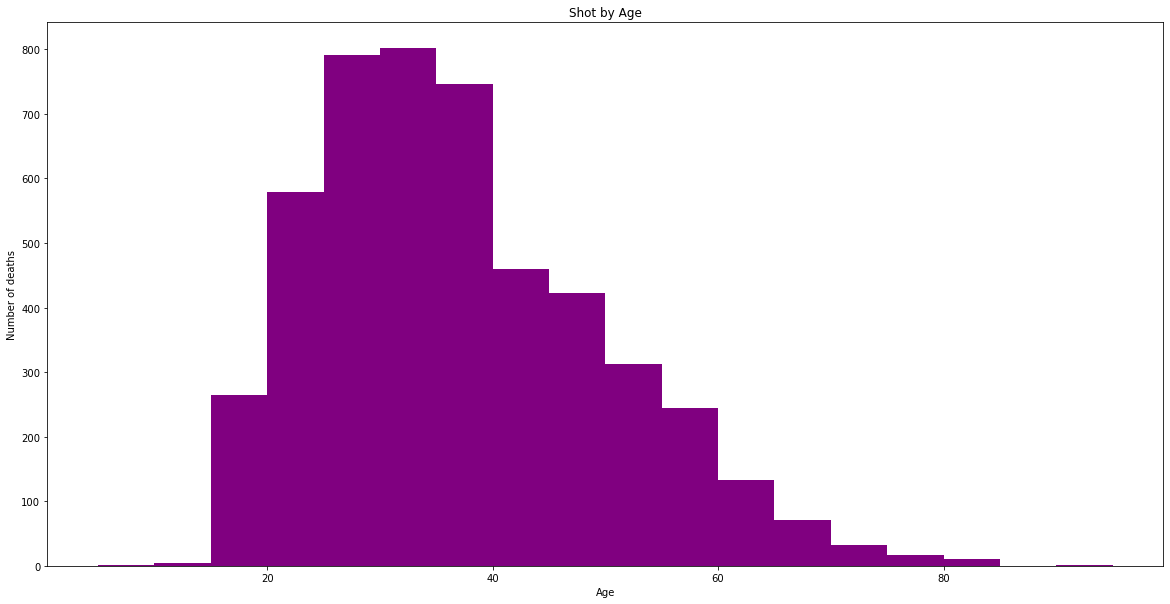

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Shot by Age")
plt.xlabel('Age')
plt.ylabel('Number of deaths')
plt.hist(shootingdata.age, bins=np.arange(5,100,5), color='purple');

# Top 10 city with shooting counts

In [12]:
top10_shot_by_city = shootingdata.city.value_counts().head(10)
top10_shot_by_city

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
Chicago         38
Columbus        36
Albuquerque     32
Jacksonville    31
St. Louis       30
Name: city, dtype: int64

In [13]:
topcity = shootingdata.city.value_counts().to_frame().reset_index()
topcity.columns = ['City','Count']
topcity = topcity[0:10]

<AxesSubplot:title={'center':'Top 10 city with shooting counts'}, xlabel='City', ylabel='Count'>

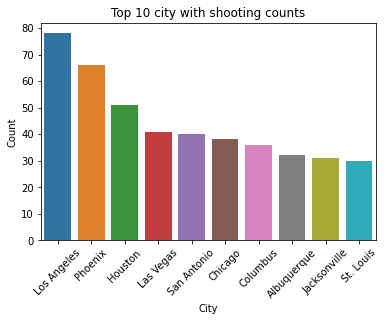

In [14]:
plt.title('Top 10 city with shooting counts')
plt.xticks(rotation=45)
sns.barplot(data=topcity,x='City',y='Count')

# Items most of the victims were armed with at the time when police shot them?

In [15]:
shot_by_arms = shootingdata.arms_category.value_counts()
shot_by_arms

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

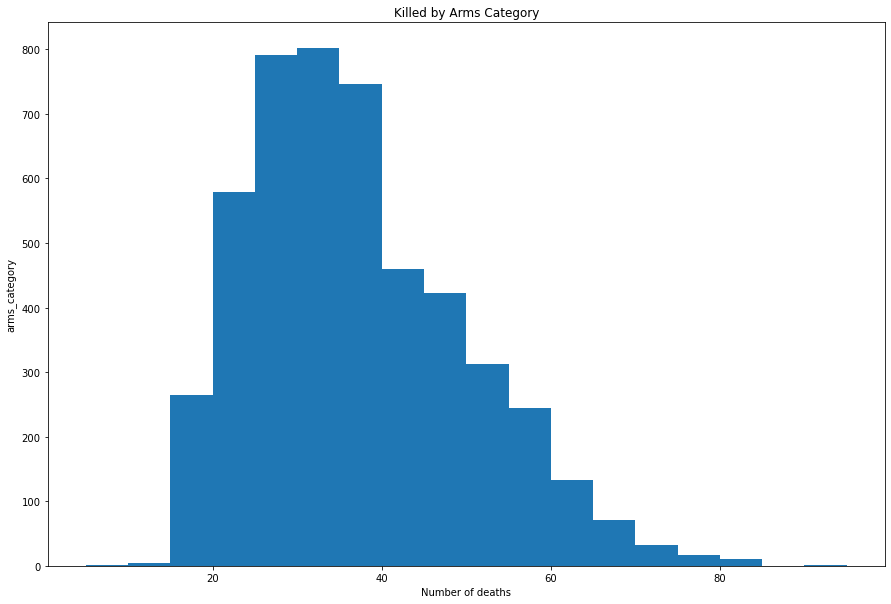

In [37]:
plt.figure(figsize=(15, 10))
plt.title("Killed by Arms Category")
plt.xlabel('Number of deaths')
plt.ylabel('arms_category')
plt.hist(shootingdata.age, bins=np.arange(5,100,5));
plt.show

# Was the suspect mentally ill?

<AxesSubplot:title={'center':'Was the shot person mentally ill?'}, xlabel='signs_of_mental_illness', ylabel='count'>

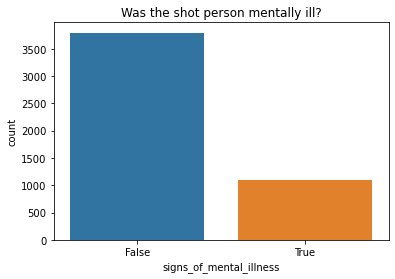

In [39]:
plt.title('Was the shot person mentally ill?')
sns.countplot(data = shootingdata, x = 'signs_of_mental_illness')

# Manner of death

<AxesSubplot:title={'center':'Manner of Death'}, xlabel='manner_of_death', ylabel='count'>

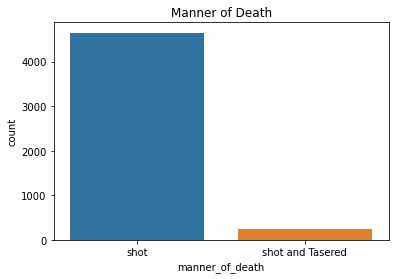

In [41]:
plt.title('Manner of Death')
sns.countplot(data = shootingdata, x = 'manner_of_death')

# Number of suspect trying to flee


<AxesSubplot:title={'center':'Suspect Flee vs Not Flee'}, xlabel='flee', ylabel='count'>

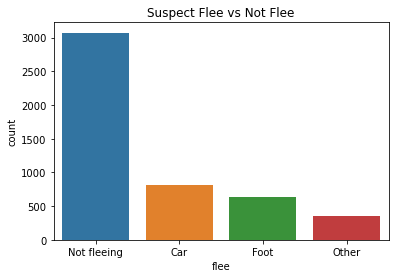

In [43]:
plt.title('Suspect Flee vs Not Flee')
sns.countplot(data = shootingdata, x = 'flee')

<AxesSubplot:title={'center':'Suspect Flee vs Not Flee'}, xlabel='count', ylabel='arms_category'>

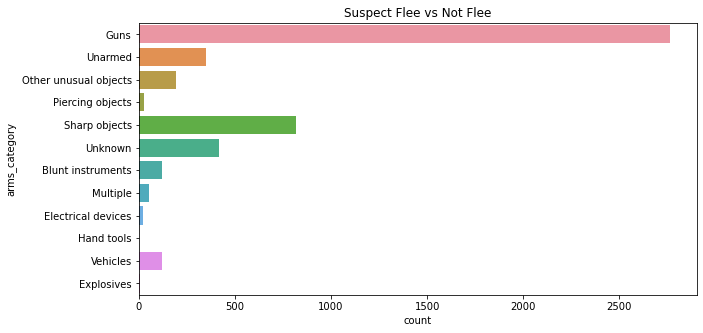

In [46]:
plt.figure(figsize=(10,5))
plt.title('Suspect Flee vs Not Flee')
sns.countplot(data = shootingdata, y = 'arms_category')